In [104]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from build_polynomial import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [106]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

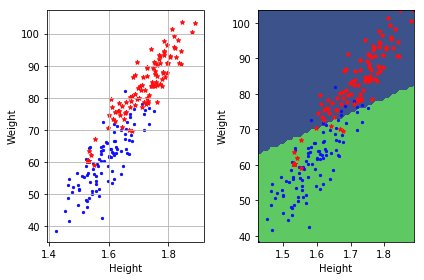

In [111]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # classify the data by linear regression: TODO
    #print(x.shape)
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    #print(tx.shape)
    #tx = build_poly(x,1)
    #print(tx.shape)
    w = least_squares(y,tx)
    # w = least squares with respect to tx

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [34]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return (np.exp(t))/(1+np.exp(t))


In [36]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    loss = np.sum(np.log(1+np.exp(tx.dot(w))) - y*(tx.dot(w)))
    return loss

In [31]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    grad = tx.T.dot(sigmoid(tx.dot(w))-y)
    return grad

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [119]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # compute the cost
    loss = calculate_loss(y, tx, w)
    
    # compute the gradient
    grad = calculate_gradient(y, tx, w)
    
    # update w
    w = w - gamma * grad
    return loss, w

Demo!

[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]

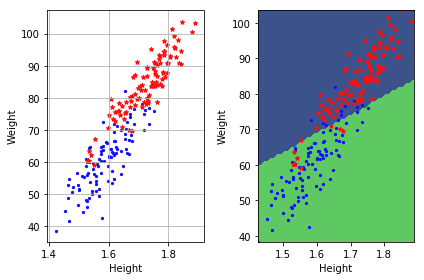

In [121]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))
    print(y.shape)


    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [92]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # calculate hessian
    N = tx.shape[0]
    S = np.zeros([N, N])
    for n in range(N):
        sxw = sigmoid(tx[n].T.dot(w))
        S[n,n] = sxw * (1-sxw)
    return tx.T.dot(S).dot(tx)

    

Write a function below to return loss, gradient, and hessian.

In [93]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""

    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    return loss, gradient, hessian



### Using Newton's method
Use Newton's method for logistic regression.

In [98]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    gamma = 0.1
    # return loss, gradient and hessian
    loss, gradient, hessian = logistic_regression(y, tx, w)

    # update w
    change = gamma * np.linalg.inv(hessian).dot(gradient)
    w = w - change
    
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=1, the loss=126.31098316846277
Current iteration=2, the loss=116.17884131836637
Current iteration=3, the loss=107.63603770167283
Current iteration=4, the loss=100.30205497477121
Current iteration=5, the loss=93.92045949357015
Current iteration=6, the loss=88.3106265888207
Current iteration=7, the loss=83.3406199799586
Current iteration=8, the loss=78.91107491445945
Current iteration=9, the loss=74.94517505459513
Current iteration=10, the loss=71.38217682387337
Current iteration=11, the loss=68.17308537750941
Current iteration=12, the loss=65.27768184568599
Current iteration=13, the loss=62.66242563531865
Current iteration=14, the loss=60.29893947109507
Current iteration=15, the loss=58.16289282063311
Current iteration=16, the loss=56.23316456560804
Current iteration=17, the loss=54.4912061318458
Current iteration=18, the loss=52.92055177744631
Current iteration=19, the loss=51.5064391340143
Current iteration=20, the los

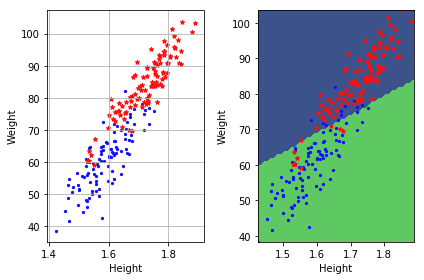

In [99]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [101]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # return loss, gradient, and hessian
    loss = np.sum(np.log(1+np.exp(tx.dot(w))) - y*(tx.dot(w))) + (lambda_ /2.0) * w.T.dot(w)
    
    gradient = tx.T.dot(sigmoid(tx.dot(w))-y) + lambda_ * w

    # calculate hessian
    N = tx.shape[0]
    S = np.zeros([N, N])
    for n in range(N):
        sxw = sigmoid(tx[n].T.dot(w))
        S[n,n] = sxw * (1-sxw)
    hessian =  tx.T.dot(S).dot(tx)

    return loss, gradient, hessian


In [102]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # return loss, gradient
    loss, gradient, hessian = penalized_logistic_regression(y, tx, w, lambda_)
    
    # update w
    w = w - gamma * gradient
    
    return loss, w

Current iteration=0, loss=[[ 138.62943611]]
Current iteration=100, loss=[[ 44.83540395]]
Current iteration=200, loss=[[ 43.49960386]]
Current iteration=300, loss=[[ 43.28110659]]
Current iteration=400, loss=[[ 43.23721999]]
Current iteration=500, loss=[[ 43.22766657]]
Current iteration=600, loss=[[ 43.22551203]]
Current iteration=700, loss=[[ 43.22501811]]
Current iteration=800, loss=[[ 43.22490401]]
Current iteration=900, loss=[[ 43.22487755]]
Current iteration=1000, loss=[[ 43.2248714]]
loss=41.223299860188874


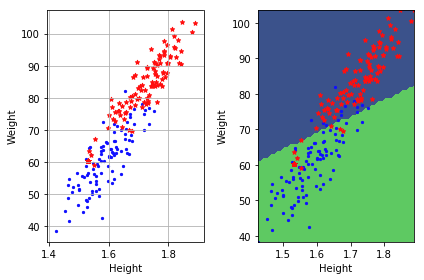

In [103]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)